<a href="https://colab.research.google.com/github/christianmontemayor/PatternRecognitionMontemayor/blob/master/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

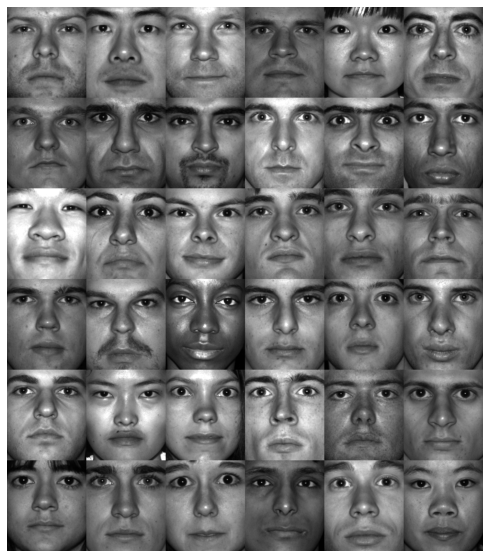

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

mat_contents = scipy.io.loadmat(os.path.join('allFaces.mat'))
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

allPersons = np.zeros((n*6,m*6))
count = 0

for j in range(6):
    for k in range(6):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(faces[:,np.sum(nfaces[:count])],(m,n)).T
        count += 1
        
img = plt.imshow(allPersons)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [17]:
U, S, VT = np.linalg.svd(allPersons,full_matrices=False)

In [18]:
eig_vals, eig_vecs = np.linalg.eig(np.transpose(allPersons) @ allPersons)

eig_vals_sorted = np.sort(eig_vals)
eig_vecs_sorted = eig_vecs[:, eig_vals.argsort()]

S_snap = np.sqrt(eig_vals_sorted)
S_inv = 1/S_snap

V_snap = eig_vecs_sorted
VT_snap = np.transpose(eig_vecs_sorted)

In [19]:
U_snap = allPersons @ V_snap @ np.diag(S_inv)

In [20]:
SVD = U[:,:1008] @ np.diag(S) @ VT
SVD_snap = U_snap[:,:1008] @ np.diag(S_snap) @ VT_snap

In [21]:
SVD

array([[80., 80., 84., ..., 66., 64., 65.],
       [81., 79., 78., ..., 69., 65., 63.],
       [80., 79., 82., ..., 69., 62., 62.],
       ...,
       [20., 14., 10., ..., 25., 30., 44.],
       [23., 16., 12., ..., 21., 23., 25.],
       [22., 19., 13., ..., 18., 21., 23.]])

In [22]:
SVD_snap

array([[80.        , 80.        , 84.        , ..., 66.        ,
        64.        , 65.        ],
       [81.        , 79.00000001, 78.        , ..., 69.        ,
        64.99999999, 63.        ],
       [80.        , 78.99999999, 82.        , ..., 69.        ,
        62.        , 62.        ],
       ...,
       [20.        , 14.        , 10.        , ..., 25.        ,
        30.        , 44.        ],
       [23.        , 16.        , 12.        , ..., 21.        ,
        23.        , 25.        ],
       [22.        , 19.        , 13.        , ..., 17.99999999,
        21.00000001, 23.        ]])

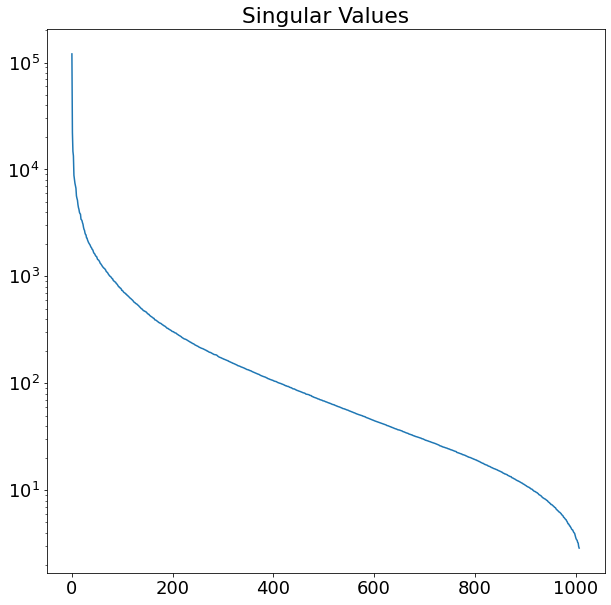

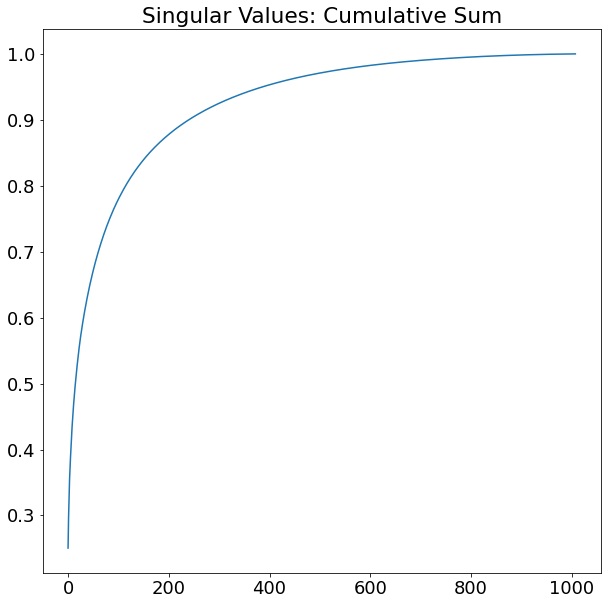

In [23]:
S_temp = np.diag(S)

plt.figure(1)
plt.semilogy(np.diag(S_temp))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S_temp))/np.sum(np.diag(S_temp)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

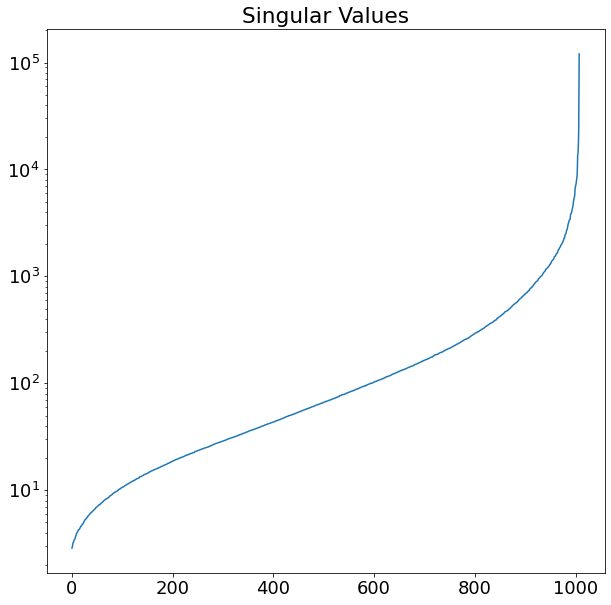

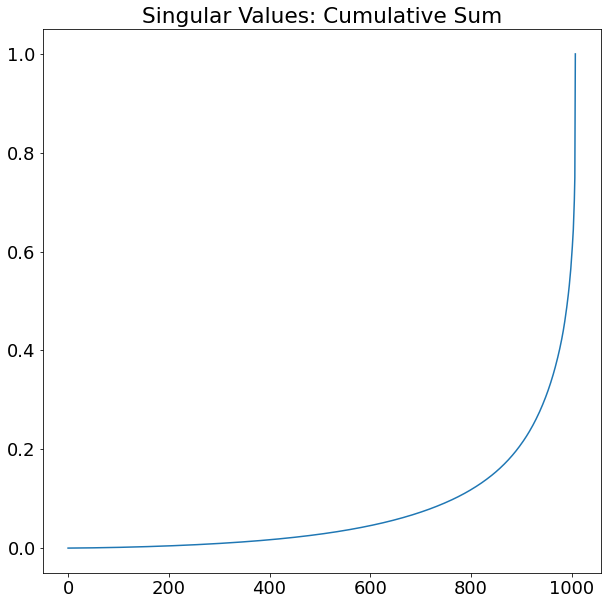

In [24]:
S_snap_temp = np.diag(S_snap)

plt.figure(1)
plt.semilogy(np.diag(S_snap_temp))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S_snap_temp))/np.sum(np.diag(S_snap_temp)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

In the original SVD, we see that the first few singular values contain the most weight, and as we progress the singular values become less and less significant. In the method of snapshots, we see this is the exact oposite as the first singular values do not have much weight, but the later have significant weight.